In [1]:
from ds_utils.ds_preamble import *
from ds_utils.ds_plotting import *
from ds_utils.ds_helper import *
import datetime
pd.options.display.max_rows = 4

calling self ds_preamble..
calling ds_helper...


# analyze crypto data

# why change to datetime64 format in pandas, instead of using the string representation of datetime?
- exposes many useful attributes (e.g., `dt.weekday_name`, `dayofyear`, `dt.hour`)
- allows comparison with timestamp from `pd.datetime('2021-01-11)`, for example
- can do comparison with string: `df.date > '2012'`
- aggregation on datetime (e.g., `mean`, `max`)

# why set datetime as index?
- slicing
- can use datetime functions directly, without `dt` accessor
- allows `resample`. To use this, index must have a datetime-like index

In [4]:
path = '/Users/whlin/Library/CloudStorage/OneDrive-HKUSTConnect/Documents/python/code_from_others/Corey_code/Python/Pandas/10-Datetime-Timeseries/ETH_1h.csv'
df = pd.read_csv(path)
# df
df.Date = pd.to_datetime(df.Date, format='%Y-%m-%d %I-%p')
df.Date.min()
df.Date.max()

Timestamp('2017-07-01 11:00:00')

Timestamp('2020-03-13 20:00:00')

In [18]:
df.assign(Date=pd.to_datetime(df.Date, format='%Y-%m-%d %I'))


,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
...,...,...,...,...,...,...,...
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87
23673,2017-07-01 11:00:00,ETHUSD,279.98,279.99,272.10,275.01,679358.87


In [3]:
def date_parse(d):
    return datetime.datetime.strptime(d, '%Y-%m-%d %I-%p') 

path = '/Users/whlin/Library/CloudStorage/OneDrive-HKUSTConnect/Documents/python/code_from_others/Corey_code/Python/Pandas/10-Datetime-Timeseries/ETH_1h.csv'
df = pd.read_csv(path)
# df = pd.read_csv(path, parse_dates=['Date'], date_parser=date_parse)
df
df.info()
df['Date'].dtype

df = df.assign(
    Date=pd.to_datetime(df.Date, format='%Y-%m-%d %I-%p'), # convert to timestamp type
    DayOfWeek=lambda df: df.Date.dt.day_name(), # get the day name from the Date column
    Year=lambda df: df.Date.dt.year, # get year name
    Month=lambda df: df.Date.dt.month, # get month name
    ).set_index('Date', drop=False)
df

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
...,...,...,...,...,...,...,...
23672,2017-07-01 12-PM,ETHUSD,275.01,275.01,271.00,274.83,824362.87
23673,2017-07-01 11-AM,ETHUSD,279.98,279.99,272.10,275.01,679358.87


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    23674 non-null  object 
 1   Symbol  23674 non-null  object 
 2   Open    23674 non-null  float64
 3   High    23674 non-null  float64
 4   Low     23674 non-null  float64
 5   Close   23674 non-null  float64
 6   Volume  23674 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.3+ MB


dtype('O')

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek,Year,Month
Date,,,,,,,,,,
2020-03-13 20:00:00,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday,2020,3
2020-03-13 19:00:00,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday,2020,3
...,...,...,...,...,...,...,...,...,...,...
2017-07-01 12:00:00,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday,2017,7
2017-07-01 11:00:00,2017-07-01 11:00:00,ETHUSD,279.98,279.99,272.10,275.01,679358.87,Saturday,2017,7


In [15]:
(df.Date[0] - df.Date[1])
pd.Timedelta("1d")

Timedelta('0 days 01:00:00')

Timedelta('1 days 00:00:00')

In [43]:
df.index.min()
# df.Date.min() # same

df.index.max()
# df.Date.max()

df.index.max() - df.index.min()

df.index[1] - df.index[0]
df.Date[1] - df.Date[0]

# pd.Series(df.index).describe(datetime_is_numeric=False)
pd.Series(df.index).describe(datetime_is_numeric=True)

Timestamp('2017-07-01 11:00:00')

Timestamp('2020-03-13 20:00:00')

Timedelta('986 days 09:00:00')

Timedelta('-1 days +23:00:00')

Timedelta('-1 days +23:00:00')

count                  23674
mean     2018-11-06 15:30:00
min      2017-07-01 11:00:00
25%      2018-03-05 01:15:00
50%      2018-11-06 15:30:00
75%      2019-07-11 05:45:00
max      2020-03-13 20:00:00
Name: Date, dtype: object

In [81]:
# filter by year
df[df.index>'2020']
# df[df.Date>'2020'] # same
# df.query("index >'2020'") # same as above

# filter by date
df[df.index>'2020-01-01']
# df[df.Date>'2020-01-01']
# df.query("index >'2020-01-01'") # same as above

# filter by chain by year
df[(df.index >= '2019') & (df.index < '2020')]
# df['2019' <= df.index < '2020'] # not work 
# df.query(" '2019' <= index <'2020' ") # inside query, we can do chain inequality
# df.query(" 2019 <= index <2020 ") # same as above. QUESTION: Why no need quotes for the year??

# filter by chain by date 
df[(df.index>='2019-12-29') & (df.index<'2020-01-01')] # same as above
# df[(df.index>=pd.to_datetime('2019-12-29')) & (df.index<pd.to_datetime('2020-01-01'))]
# df.query(" '2019-12-29' <= index <'2020-01-01' ")

# df.Index[0] >= '2019' # not work. TypeError: '>=' not supported between instances of 'Timestamp' and 'str'. The reason is that df.Index[0] is just a python datetime object, which doesn't support this!

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek,Year,Month
Date,,,,,,,,,,
2020-03-13 20:00:00,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday,2020,3
2020-03-13 19:00:00,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday,2020,3
...,...,...,...,...,...,...,...,...,...,...
2020-01-01 02:00:00,2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday,2020,1
2020-01-01 01:00:00,2020-01-01 01:00:00,ETHUSD,128.34,130.14,128.32,130.14,635419.40,Wednesday,2020,1


,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek,Year,Month
Date,,,,,,,,,,
2020-03-13 20:00:00,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday,2020,3
2020-03-13 19:00:00,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday,2020,3
...,...,...,...,...,...,...,...,...,...,...
2020-01-01 02:00:00,2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday,2020,1
2020-01-01 01:00:00,2020-01-01 01:00:00,ETHUSD,128.34,130.14,128.32,130.14,635419.40,Wednesday,2020,1


,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek,Year,Month
Date,,,,,,,,,,
2019-12-31 23:00:00,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday,2019,12
2019-12-31 22:00:00,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday,2019,12
...,...,...,...,...,...,...,...,...,...,...
2019-01-01 01:00:00,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday,2019,1
2019-01-01 00:00:00,2019-01-01 00:00:00,ETHUSD,130.53,131.91,130.48,131.62,1067136.21,Tuesday,2019,1


,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek,Year,Month
Date,,,,,,,,,,
2019-12-31 23:00:00,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday,2019,12
2019-12-31 22:00:00,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday,2019,12
...,...,...,...,...,...,...,...,...,...,...
2019-12-29 01:00:00,2019-12-29 01:00:00,ETHUSD,127.69,127.77,127.22,127.48,281641.20,Sunday,2019,12
2019-12-29 00:00:00,2019-12-29 00:00:00,ETHUSD,127.91,127.95,127.54,127.69,164546.25,Sunday,2019,12


In [84]:
# slicing, if timestamp is set as index 

# df['2019'] # warning. avoid!
df.loc['2019'] # get all year 2019 records

df['2019-01-05':'2022-09-03']
df.loc['2019-01-05':'2022-09-03']
# df['2019-01-05':'2022-09-03'].Close.mean()

# access a single record
df.loc['2020-01-01'].max() 

df.query("'2019-03-18'<=Date<='2020-03-18'")

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek,Year,Month
Date,,,,,,,,,,
2019-12-31 23:00:00,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday,2019,12
2019-12-31 22:00:00,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday,2019,12
...,...,...,...,...,...,...,...,...,...,...
2019-01-01 01:00:00,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday,2019,1
2019-01-01 00:00:00,2019-01-01 00:00:00,ETHUSD,130.53,131.91,130.48,131.62,1067136.21,Tuesday,2019,1


,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek,Year,Month
Date,,,,,,,,,,
2020-03-13 20:00:00,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday,2020,3
2020-03-13 19:00:00,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday,2020,3
...,...,...,...,...,...,...,...,...,...,...
2019-01-05 01:00:00,2019-01-05 01:00:00,ETHUSD,159.43,160.61,156.77,159.42,3541976.47,Saturday,2019,1
2019-01-05 00:00:00,2019-01-05 00:00:00,ETHUSD,153.24,160.50,153.23,159.43,4907530.32,Saturday,2019,1


,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek,Year,Month
Date,,,,,,,,,,
2020-03-13 20:00:00,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday,2020,3
2020-03-13 19:00:00,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday,2020,3
...,...,...,...,...,...,...,...,...,...,...
2019-01-05 01:00:00,2019-01-05 01:00:00,ETHUSD,159.43,160.61,156.77,159.42,3541976.47,Saturday,2019,1
2019-01-05 00:00:00,2019-01-05 00:00:00,ETHUSD,153.24,160.50,153.23,159.43,4907530.32,Saturday,2019,1


Date      2020-01-01 23:00:00
Symbol                 ETHUSD
                 ...         
Year                     2020
Month                       1
Length: 10, dtype: object

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek,Year,Month
Date,,,,,,,,,,
2020-03-13 20:00:00,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday,2020,3
2020-03-13 19:00:00,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday,2020,3
...,...,...,...,...,...,...,...,...,...,...
2019-03-18 01:00:00,2019-03-18 01:00:00,ETHUSD,139.53,141.30,139.41,139.99,1155351.33,Monday,2019,3
2019-03-18 00:00:00,2019-03-18 00:00:00,ETHUSD,138.07,139.60,137.93,139.53,1057143.39,Monday,2019,3


# resampling
- why resampling? 
    - for plotting

(2,)

<AxesSubplot:xlabel='Date'>

<AxesSubplot:xlabel='Date'>

Date
2020-03-13 20:00:00    131.82
2020-03-13 19:00:00    132.02
                        ...  
2017-07-01 12:00:00    275.01
2017-07-01 11:00:00    279.99
Name: High, Length: 23674, dtype: float64

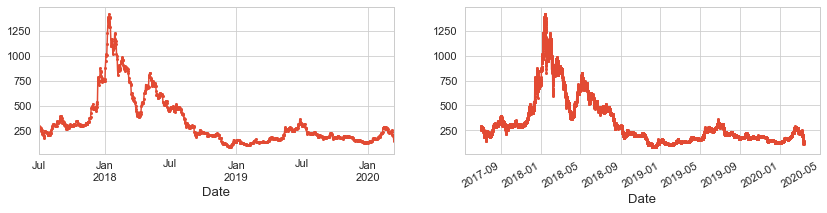

In [99]:
highs = df['High'].resample('1D').max() # originally, the high is calculated per hr. Now switch to per day. The per day high is the maximum of the 24 hr period

assert highs['2020-01-01'] == df.loc['2020-01-01'].High.max() # sanity check 

fig, axes = plt.subplots(1,2, figsize=(14,3))

axes.shape

highs.plot(ax=axes[0], marker='o', markersize=2) # resampled version
df.High.plot(ax=axes[1], marker='o', markersize=2)

<Figure size 576x360 with 0 Axes>

<AxesSubplot:>

<Figure size 576x360 with 0 Axes>

<AxesSubplot:>

<Figure size 576x360 with 0 Axes>

<AxesSubplot:>

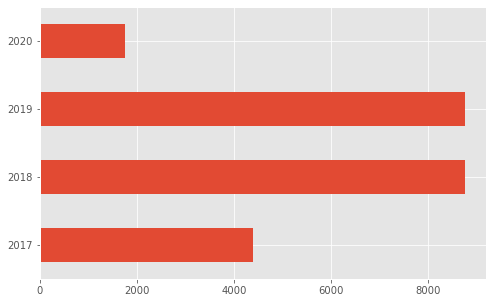

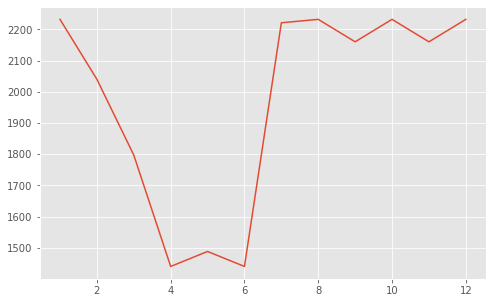

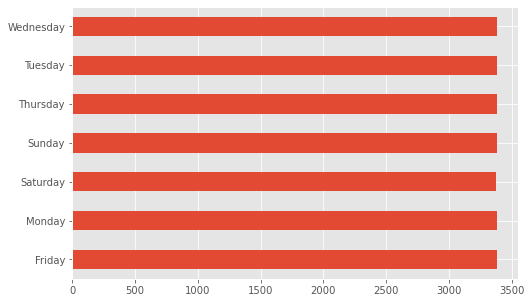

In [86]:
plt.figure()
df.Year.value_counts().sort_index().plot.barh()
plt.figure()
df.Month.value_counts().sort_index().plot()
plt.figure()
df.DayOfWeek.value_counts().sort_index().plot.barh()

In [ ]:
# df.resample('W').mean() # not useful. Want to have different aggregation for each column
df.resample('W').agg({'Close':[('my_mean', 'mean')], 'High':'max', 'Low':'min', 'Volume':'sum'}) # not useful. Want to have different aggregation for each column

,Close,High,Low,Volume
,my_mean,max,min,sum
Date,,,,
2017-07-02,268.202162,293.73,253.23,8.084631e+07
2017-07-09,261.062083,285.00,231.25,2.246746e+08
2017-07-16,195.698393,240.33,130.26,5.017750e+08
2017-07-23,212.783750,249.40,153.25,7.221637e+08
2017-07-30,203.309524,229.99,178.03,2.657305e+08
...,...,...,...,...
2020-02-16,255.198452,290.00,216.31,3.912867e+08
2020-02-23,265.321905,287.13,242.36,3.067838e+08


In [ ]:
df['2020-01':'2020-02'].Close.mean()

195.1655902777778

In [ ]:
df.loc['2020-01-01'].High.max()

132.68

In [ ]:
# if we want to change the time period to something else, we need to do `resampling`
highs = df.High.resample('D').max()

In [ ]:
highs['2020-01-01'] 

132.68

<AxesSubplot:xlabel='Date'>

<Figure size 576x360 with 0 Axes>

<AxesSubplot:xlabel='Date'>

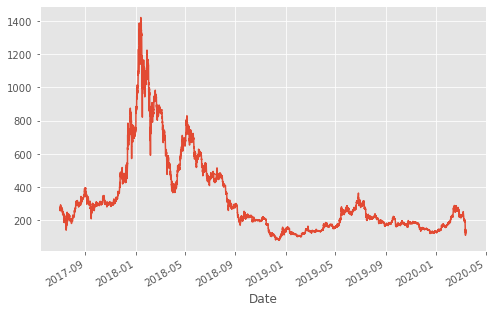

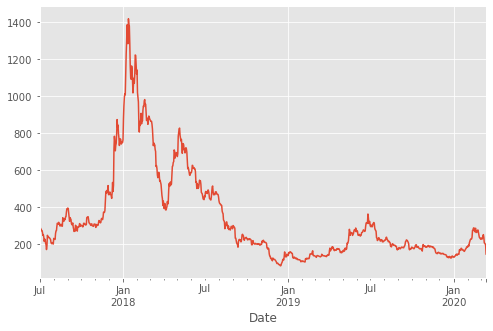

In [ ]:
df.High.plot()
plt.figure()
highs.plot()

In [ ]:
df.dtypes
# df.loc[0, 'Date']
# df.loc[0, 'Date'].day_name()

Date      datetime64[ns]
Symbol            object
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [ ]:
df = pd.read_csv('http://bit.ly/uforeports')

In [ ]:
# df.nunique()
df['Time'] = pd.to_datetime(df.Time)

In [ ]:
# df.Time.dt.weekday
df['day'] = df.Time.dt.day_name()
df['year'] = df.Time.dt.year

<AxesSubplot:>

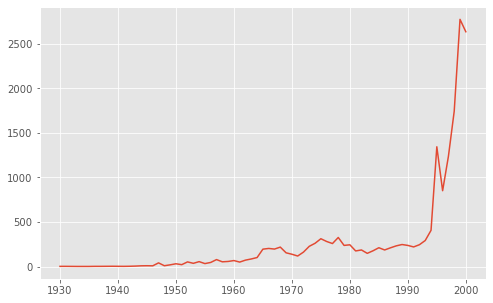

In [ ]:
# sns.countplot(x=df.day)

# df.year.value_counts()

# sns.lineplot(x=[4,5,6,6,6], y=[1,2,50,33,10000], ci=True)



# plt.figure()
# sns.lineplot(x=df.year)
# df.year.value_counts().sort_index().plot()


temp = df.year.value_counts()
sns.lineplot(x=temp.index, y=temp.values)

In [101]:
t = df.Time[:1]
t
t.dt.date
t.dt.time
t.dt.year
t.dt.month
t.dt.day
t.dt.hour
t.dt.minute
t.dt.second
t.dt.week
t.dt.weekofyear
t.dt.dayofweek

t.dt.month_name()
t.dt.day_name()

t.dt.days

AttributeError: 'DataFrame' object has no attribute 'Time'

NameError: name 'df' is not defined

In [ ]:
idx = pd.date_range("2018-01-01", periods=5, freq='H')
ts = pd.Series(range(len(idx)), index=idx)
ts
ts.resample('2h').mean()


2018-01-01 00:00:00    0
2018-01-01 01:00:00    1
2018-01-01 02:00:00    2
2018-01-01 03:00:00    3
2018-01-01 04:00:00    4
Freq: H, dtype: int64

2018-01-01 00:00:00    0.5
2018-01-01 02:00:00    2.5
2018-01-01 04:00:00    4.0
Freq: 2H, dtype: float64

In [ ]:
d = pd.Timestamp('2018-01-05')
d.day_name()

d + pd.Timedelta('1 day')

d + pd.offsets.BDay()

'Friday'

Timestamp('2018-01-06 00:00:00')

Timestamp('2018-01-08 00:00:00')

In [ ]:
# pd.date_range('2018-01-01', periods=1000)

idx



DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00'],
              dtype='datetime64[ns]', freq='H')

In [ ]:
tips = sns.load_dataset('tips')
tips = tips.set_index('sex')

tips.index


CategoricalIndex(['Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male',
                  'Male', 'Male', 'Male',
                  ...
                  'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female',
                  'Male', 'Male', 'Female'],
                 categories=['Male', 'Female'], ordered=False, dtype='category', name='sex', length=244)

In [ ]:
dt = datetime.datetime(2011,3,15, 8, 12, 33)
dt.strftime('%Y_%m_%d_%H_%M_%S')

'2011_03_15_08_12_33'

In [ ]:
tsdf = pd.DataFrame(
    np.random.randn(1000, 3),
    columns=["A", "B", "C"],
    index=pd.date_range("1/1/2000", periods=1000),
)

tsdf

# extract the date where the maximum value for each column occurred:
tsdf.apply(lambda x: x.idxmax())
tsdf.apply(pd.Series.interpolate)  # can pass series operations


In [ ]:
index = pd.date_range("10/1/1999", periods=1100)
ts = pd.Series(np.random.normal(0.5, 2, 1100), index)
ts = ts.rolling(window=100, min_periods=100).mean().dropna()
transformed = ts.groupby(lambda x: x.year).transform(
    lambda x: (x - x.mean()) / x.std()
)

transformed
